# Problem Statement
Access to safe drinking-water is essential to health, a basic human right and a component of
effective policy for health protection. This is important as a health and development issue at anational, regional and local level. The objective is to predict the potability of water based on given
features.
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

# Dataset: Water Potability Prediciton dataset

# 1. Import Libraries/Dataset

## Download the dataset

In [ ]:
!wget -O ./water_potability.csv "https://bits-pilani.instructure.com/files/392572/download?download_frd=1&verifier=1poyjl8cS8RJQcYUKgmLkWyDCNPXMUYeQVTU9v95"

--2023-07-08 10:13:01--  https://bits-pilani.instructure.com/files/392572/download?download_frd=1&verifier=1poyjl8cS8RJQcYUKgmLkWyDCNPXMUYeQVTU9v95
Resolving bits-pilani.instructure.com (bits-pilani.instructure.com)... 13.250.68.216, 52.74.219.246, 3.0.168.153
Connecting to bits-pilani.instructure.com (bits-pilani.instructure.com)|13.250.68.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://a11693-392572.cluster42.canvas-user-content.com/files/11693~392572/download?download_frd=1&verifier=1poyjl8cS8RJQcYUKgmLkWyDCNPXMUYeQVTU9v95 [following]
--2023-07-08 10:13:02--  https://a11693-392572.cluster42.canvas-user-content.com/files/11693~392572/download?download_frd=1&verifier=1poyjl8cS8RJQcYUKgmLkWyDCNPXMUYeQVTU9v95
Resolving a11693-392572.cluster42.canvas-user-content.com (a11693-392572.cluster42.canvas-user-content.com)... 3.0.168.153, 52.74.219.246, 13.250.68.216
Connecting to a11693-392572.cluster42.canvas-user-content.com (a11693-392572.cluster42

## Import necessary library

In [ ]:
#Data Import
import pandas as pd
import numpy as np

#Data Visualization and Exploration
from matplotlib import  pyplot as plt
import missingno as msno
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

#Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# 2. Data Visualization and Exploration

## Read the dataset

In [ ]:
data = pd.read_csv('./water_potability.csv')

## Sanity Check

## 2.1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.



In [ ]:
data.head(2)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0      NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.057858     6.635246         NaN    592.885359   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0

Checking the shape of the given dataset rows and column

In [ ]:
rows, columns = data.shape
print(f'Shape of the dataset Rows: {rows} & Columns: {columns}')

Shape of the dataset Rows: 3276 & Columns: 10


Identify the duplicate values

In [ ]:
#data is duplicates
have_duplicate_rows = data.duplicated().any()
have_duplicate_rows

False

## Data Information


*   Learning the dtypes of columns
*   How many non-null values there are in those columns



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Getting the statistical summary of dataset

In [ ]:
data.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

## 2.2. Comment on class imbalance with appropriate visualization method.

Distribution of Target Variable within the sample data


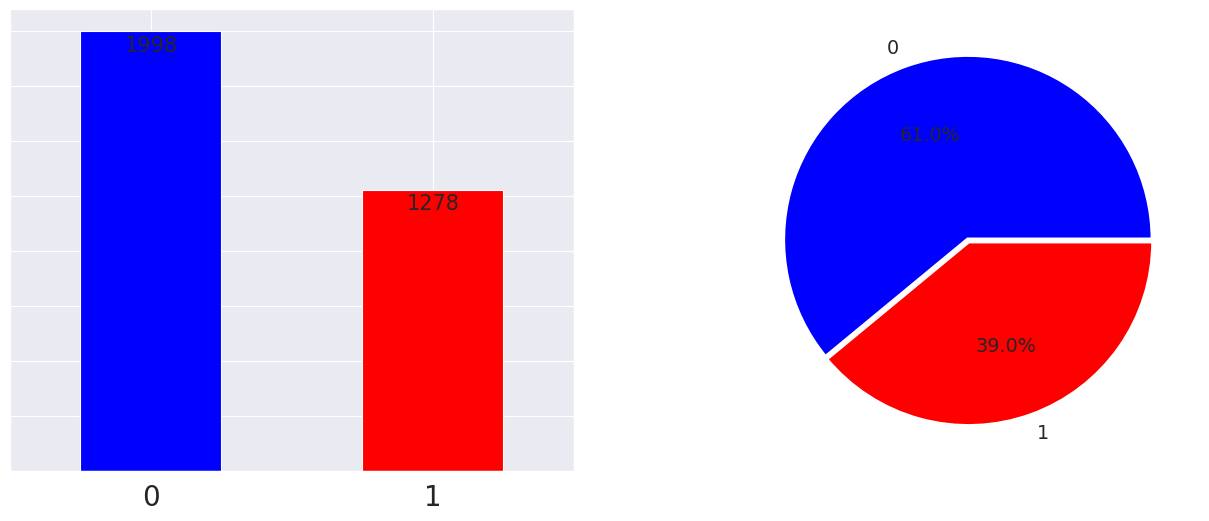

In [ ]:
print('Distribution of Target Variable within the sample data')

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

data.Potability.value_counts().plot(kind='bar', color=['blue', 'Red'], rot=0, ax=ax[0])
# Iterrating over the bars one-by-one
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height(), 'd'),
     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
      ha='center', va='center', size=15, xytext=(0, -10),
      textcoords='offset points')
ax[0].tick_params(left=False, labelleft=False)
ax[0].xaxis.set_tick_params(labelsize=20)

labels = list(data['Potability'].unique())
## use the wedgeprops and textprops arguments to style the wedges and texts, respectively
ax[1].pie(data['Potability'].value_counts(), labels=labels, autopct = '%1.1f%%',
          colors=['blue', 'Red'], explode = [0.005]*len(labels),
          textprops={'size': 'x-large'},
         wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

plt.show()

Data distribution for water potability is 61:39 ratio. (i.e. 61% is not potable and 39% is potable).


Plotting the Distribution of Each target vs the particular feature.


<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


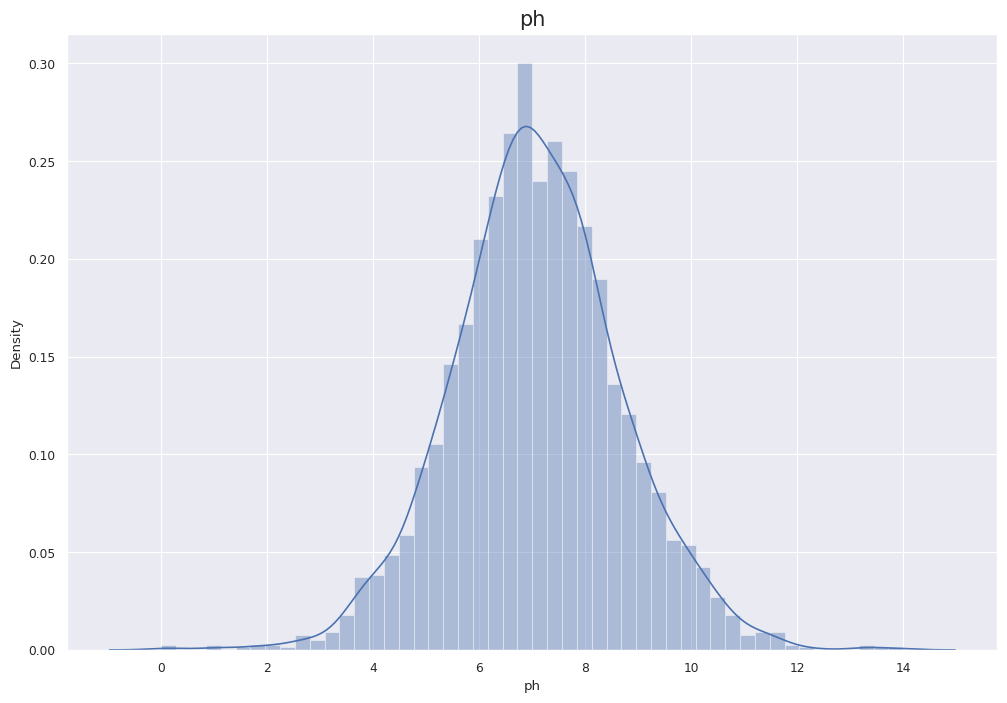

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


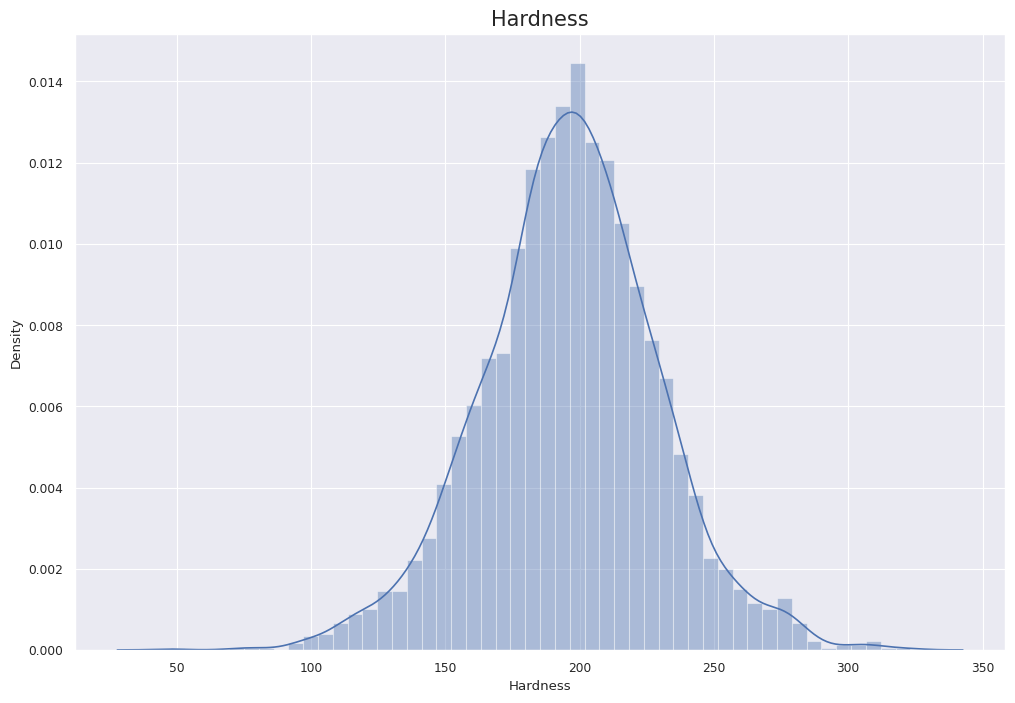

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


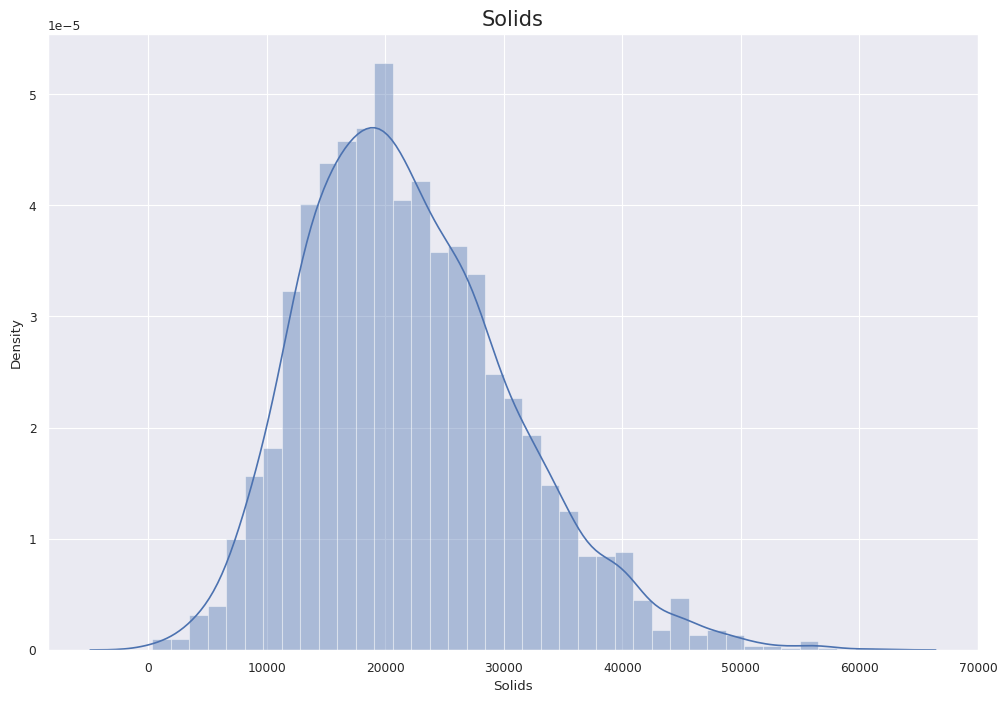

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


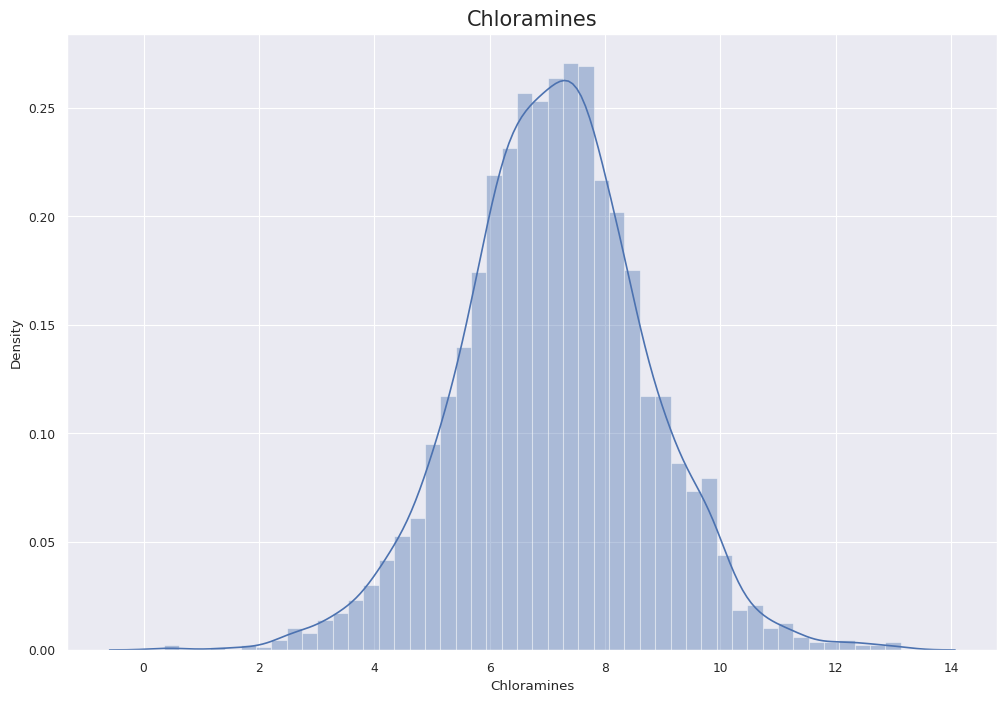

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


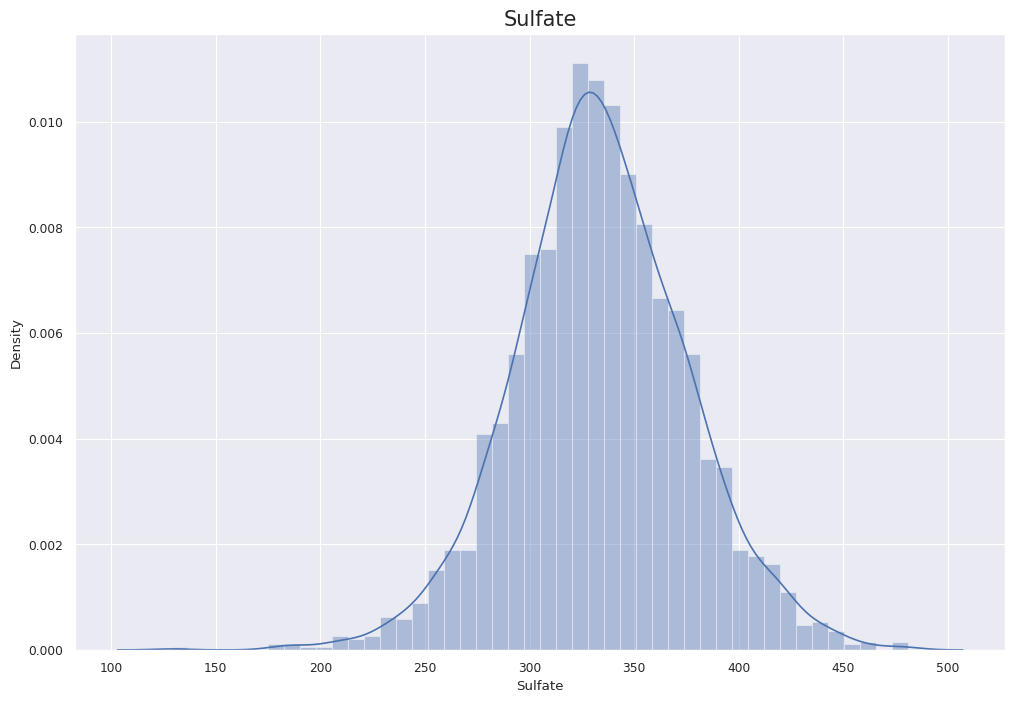

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


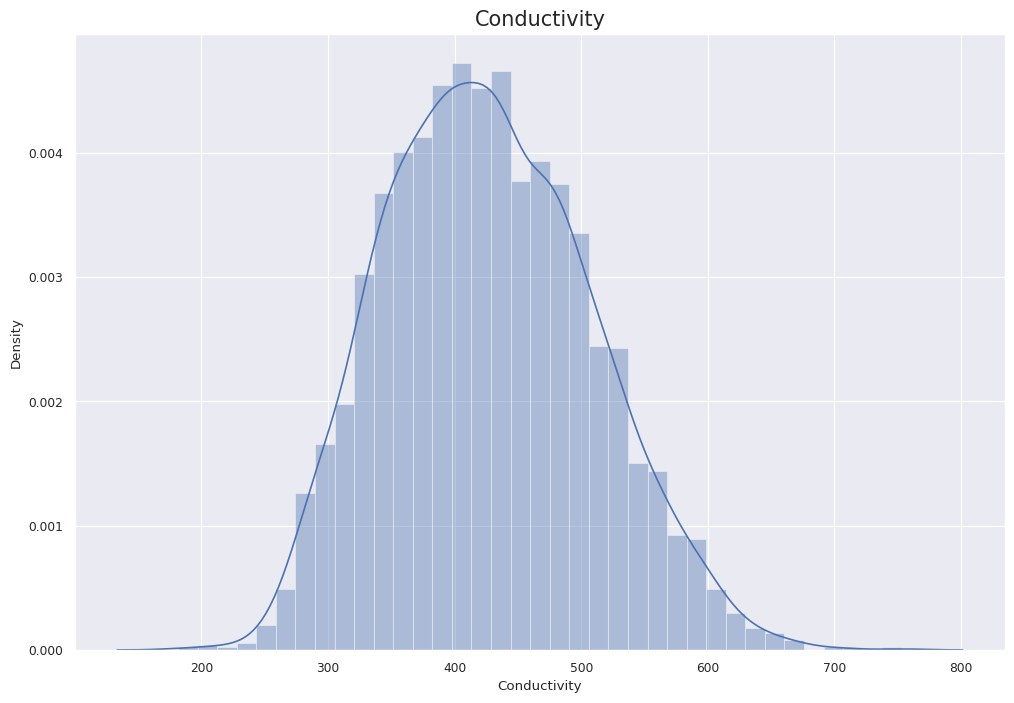

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


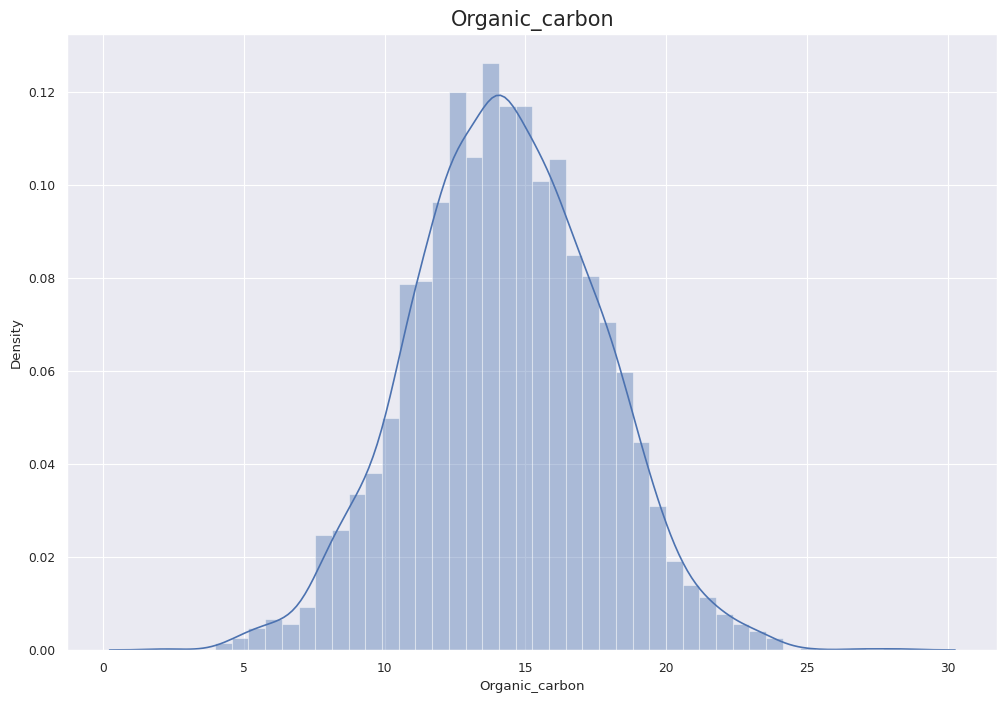

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


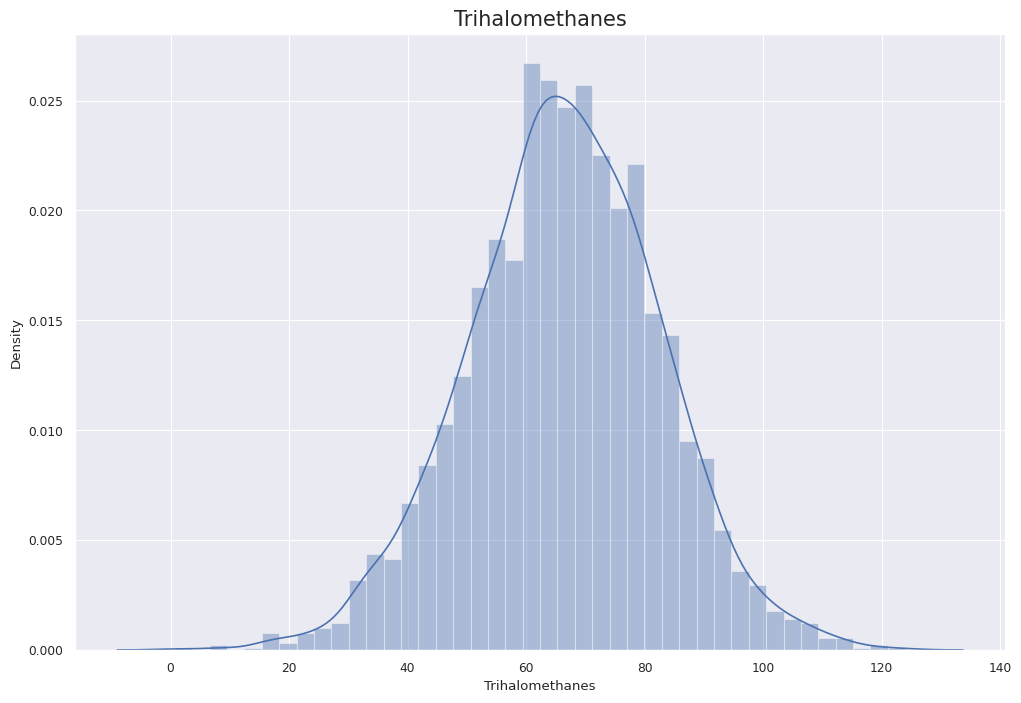

<ipython-input-72-551a473ed027>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


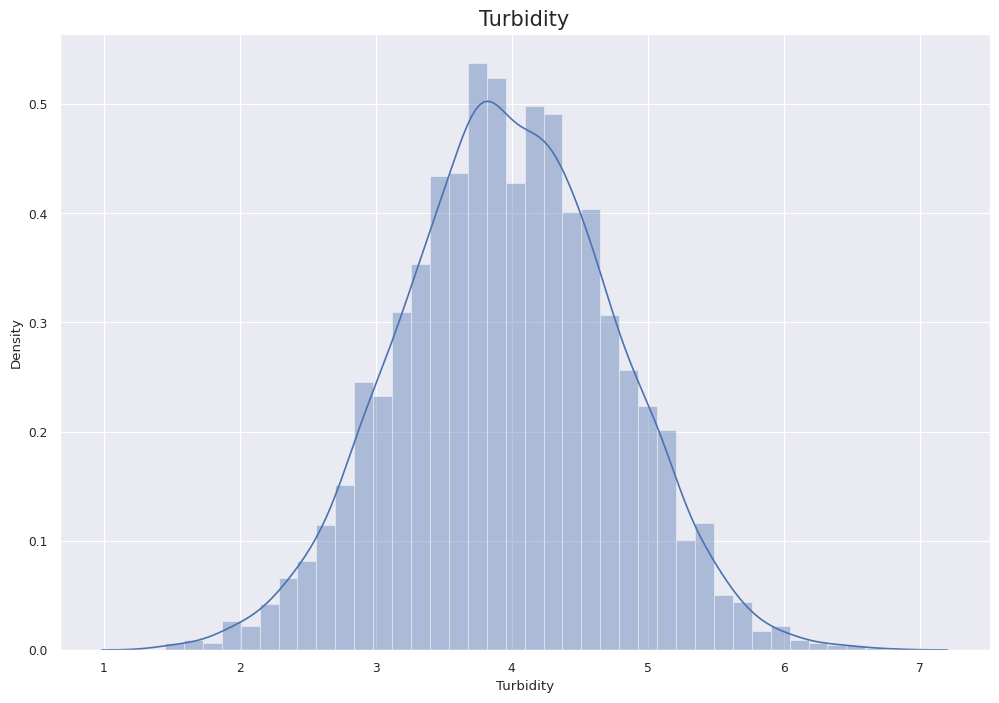

In [ ]:
for col in data.drop("Potability", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.distplot(data[col])
    plt.title(f"{col}", size=15)
    plt.show()

### From the above gaussian curve observation, ***solid feature*** is having a postive skew and remaining feature are having uniform distribution.

## 2.3. Provide appropriate data visualizations to get an insight about the dataset.

- Relationship Between Each Feature and Target Variable (Potability)


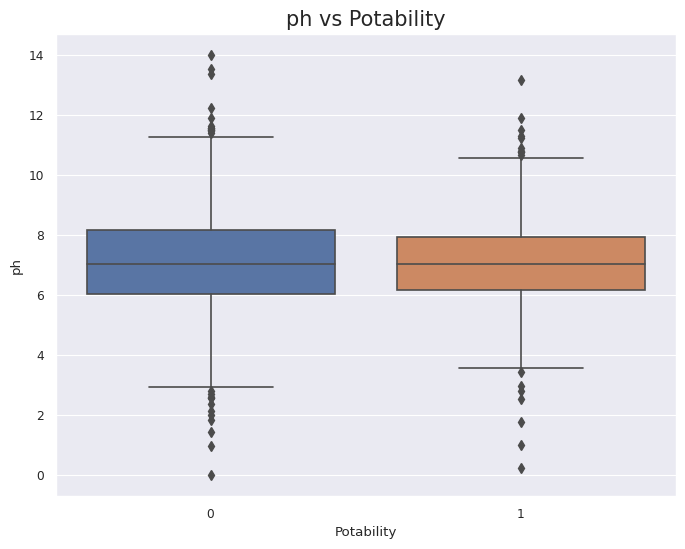

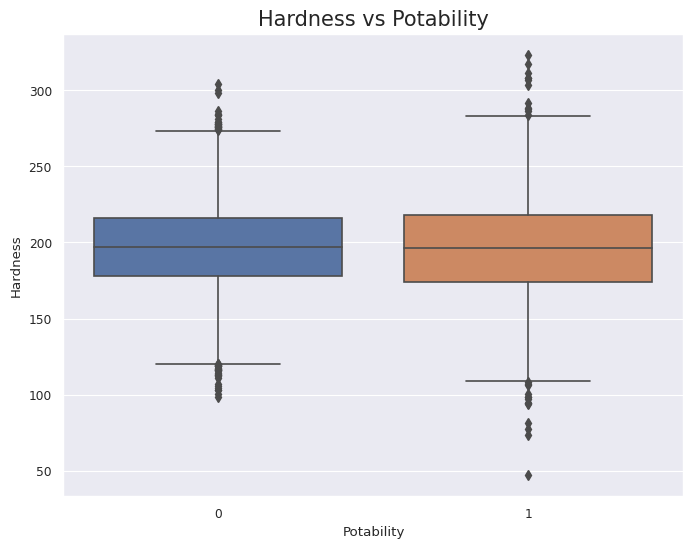

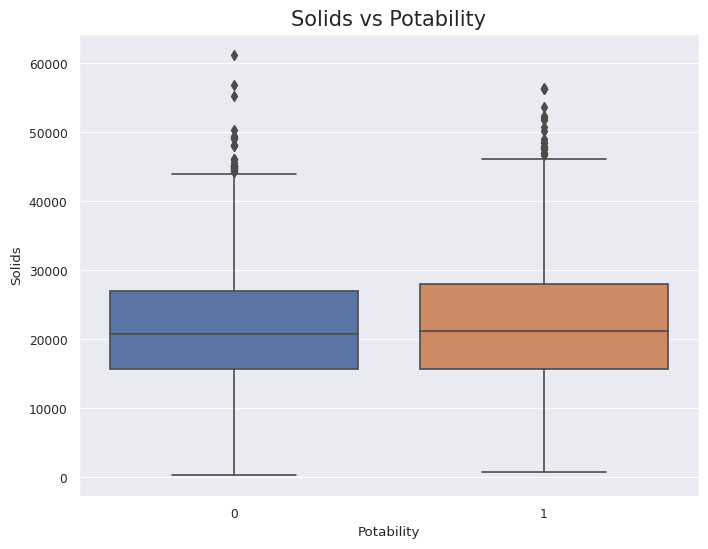

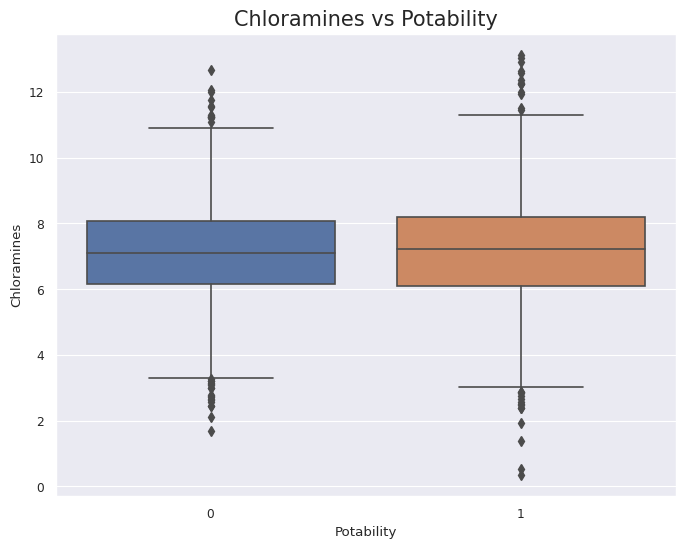

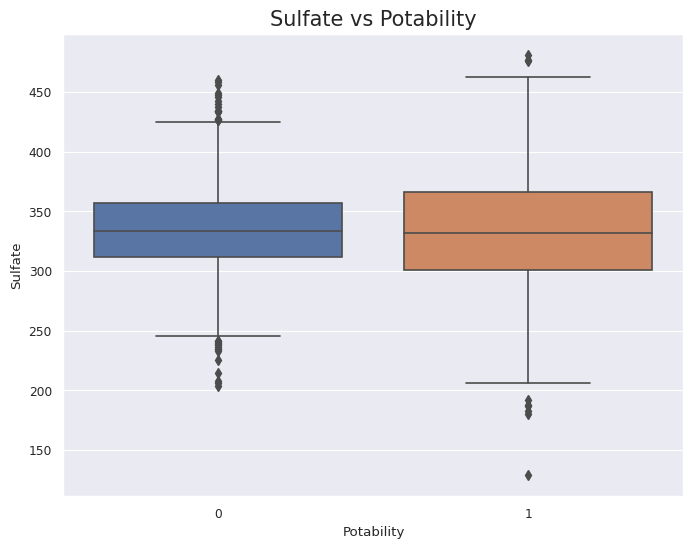

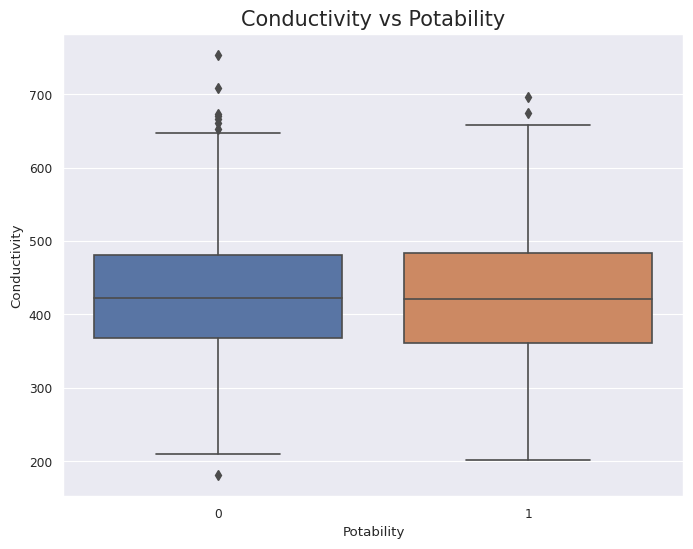

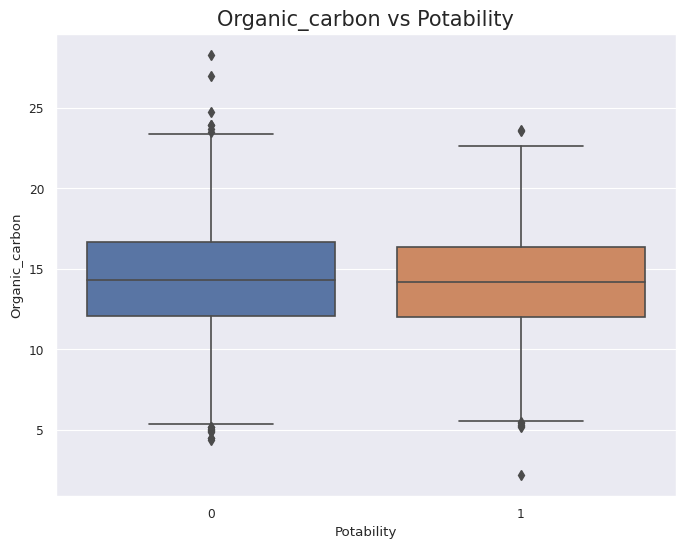

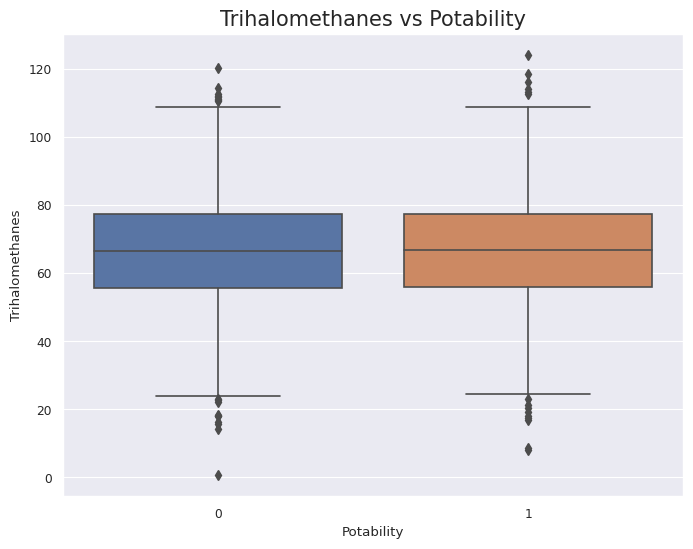

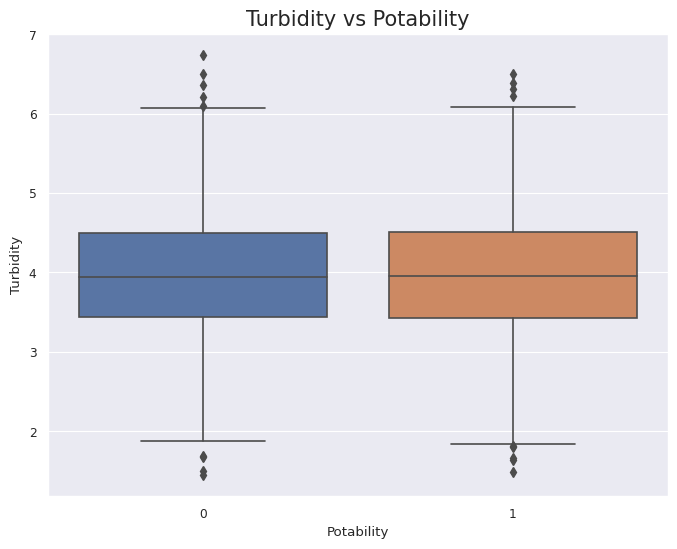

In [ ]:
for col in data.drop("Potability", axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data["Potability"],y= data[col])
    plt.title(f"{col} vs Potability", size=15)
    plt.show()

### Box Graph Analysis for target vs feature - Outlier Analysis

Based on IQR the feature,

*   ph has 142 outliers.
*   Hardness has 83 outliers.
*   Solids has 47 outliers.
*   Chloramines has 61 outliers.
*   Sulfate has 264 outliers
*   Conductivity has 11 outliers.
*   Organic_carbon has 25 outliers.
*   Trihalomethanes has 54 outliers.
- Turbidity has 19 outliers.
- Potability has 0 outliers.

Visualizing the Correlation between the ten numerical real-valued variables using pairplot visualization.

- Blue ---> Non Potable (0)
- Orange ---> Potable (1)



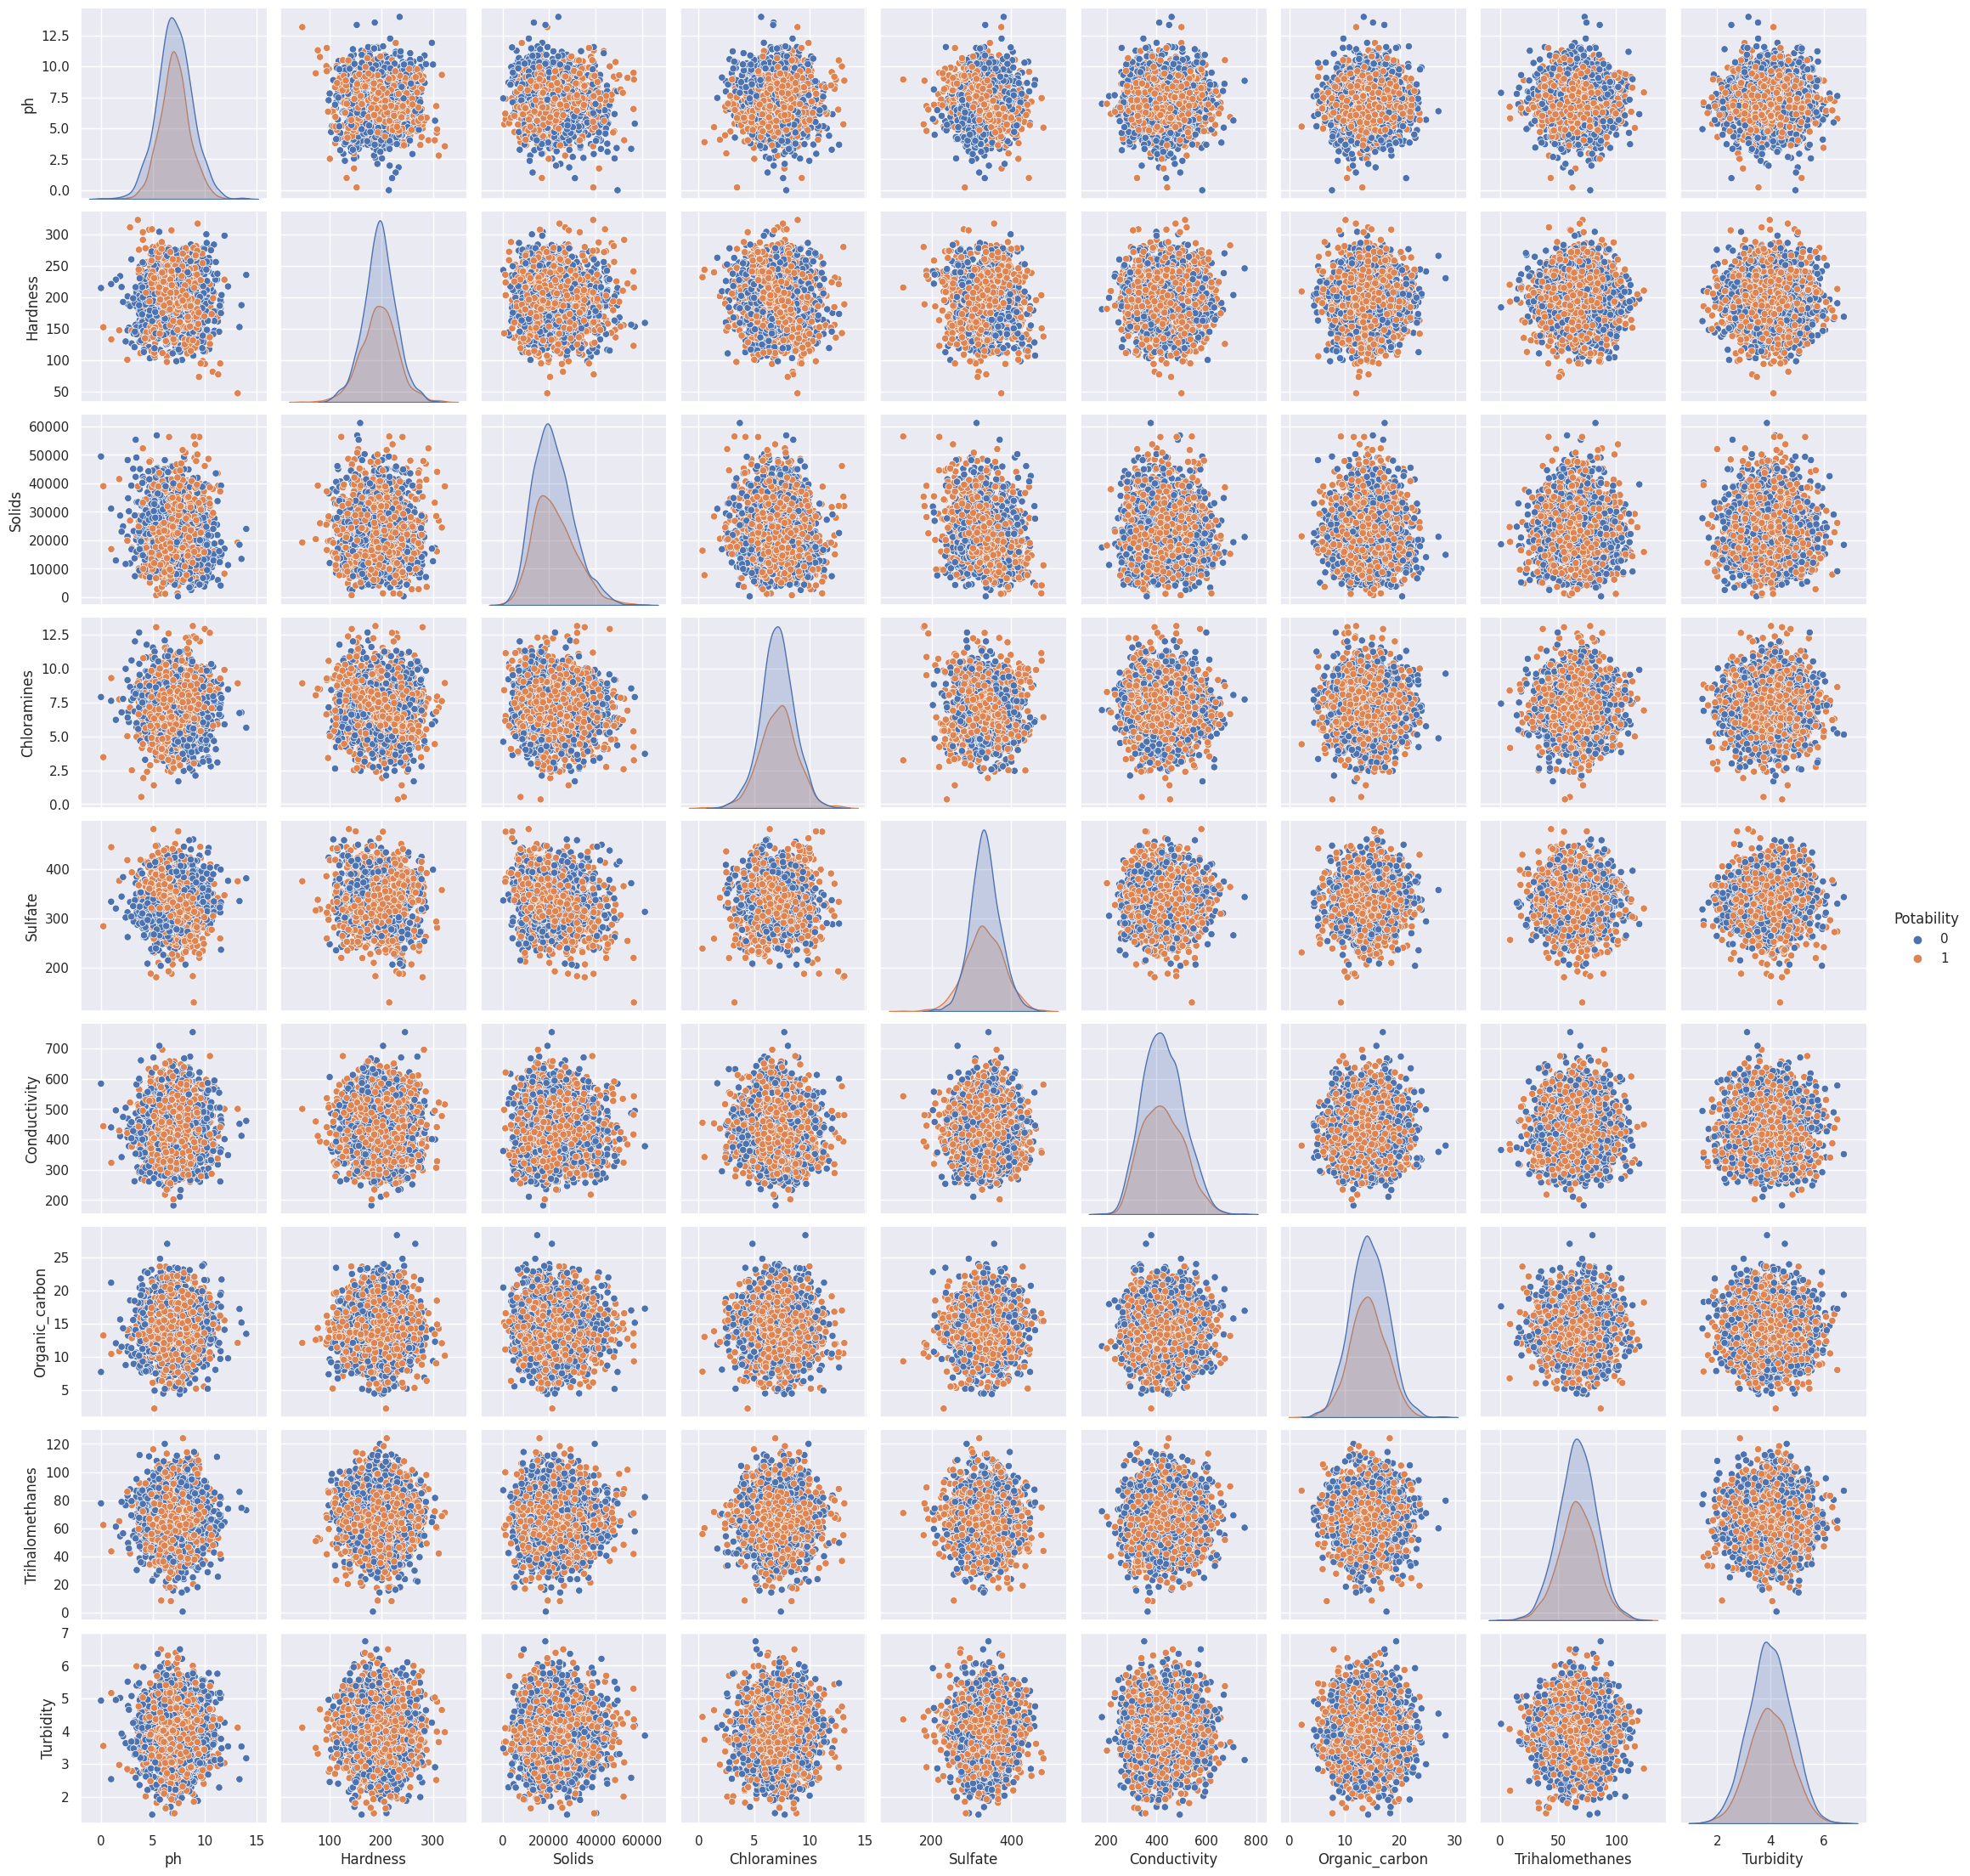

In [ ]:
sns.set()
sns.pairplot(data, hue="Potability")

## 2.4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step?


In [ ]:
print('Correlation of Potability with feature variables:')
features = list(data.columns.drop('Potability'))

Corr = list()
for cols in features:
    Corr.append(data[cols].corr(data['Potability']))

corrDf = pd.DataFrame({'Features' : features, 'Corr' : Corr})
corrDf['Corr'] = corrDf['Corr'].abs()
corrDf.sort_values(by='Corr', ascending = True)

Correlation of Potability with feature variables:


Features      Corr
8        Turbidity  0.001581
0               ph  0.003556
7  Trihalomethanes  0.007130
5     Conductivity  0.008128
1         Hardness  0.013837
4          Sulfate  0.023577
3      Chloramines  0.023779
6   Organic_carbon  0.030001
2           Solids  0.033743

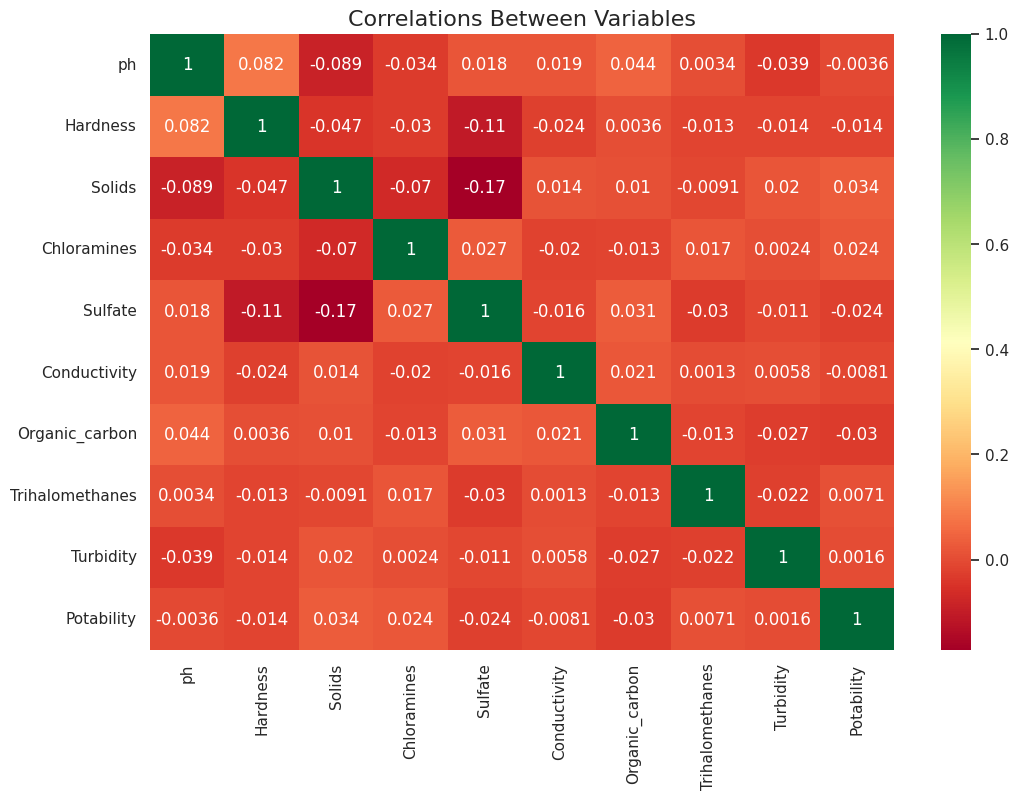

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.title("Correlations Between Variables", size=16)
plt.show()

Visualizing the linear correlations between features using Heatmap Visualization.
The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.

All are the linear correlation. Some values are not correlated such as,

*   (Sulfate, Solids)
*   (Hardness, Solids)
*   (Hardness, pH)  

Overall: Most of the data correlation is good, non correlated will be handled on the preprocessing.

# 3. Data Pre-processing and cleaning

## 3.1 Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any,handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell.

 ### Identifying NULL or Missing Values

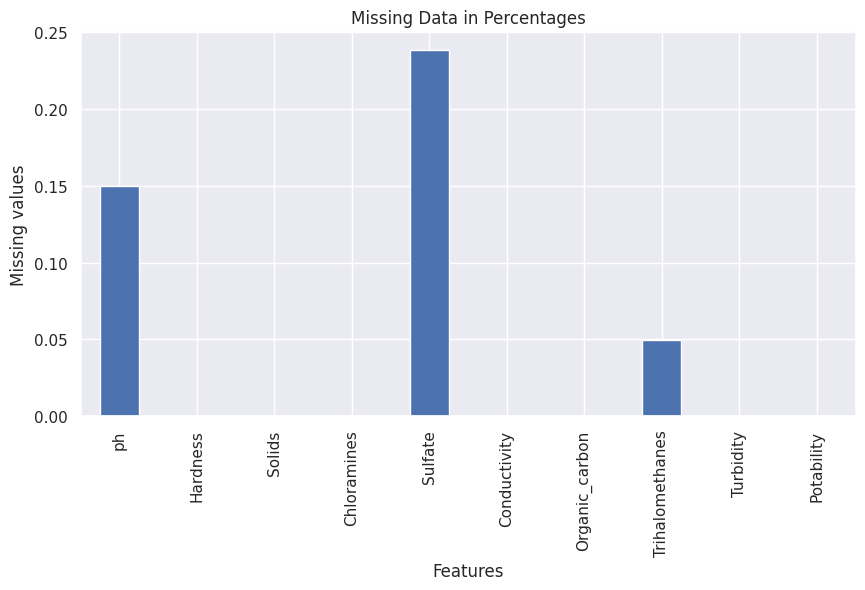

In [ ]:
data.isnull().mean().plot.bar(figsize=(10,5))
plt.ylabel('Missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

Null Values Identified for the below features,

ph                 491 \
Hardness             0 \
Solids               0 \
Chloramines          0 \
Sulfate            781 \
Conductivity         0 \
Organic_carbon       0 \
Trihalomethanes    162 \
Turbidity            0 \
Potability           0 \

## Handling missing data

In [ ]:
# Mean for the features
data.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [ ]:
# Median for the features
data.median()

ph                     7.036752
Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Sulfate              333.073546
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.622485
Turbidity              3.955028
Potability             0.000000
dtype: float64

- Based on the above analysis both mean and median have almost similar value, so to replace the missing/null values we are going with mean of individual feature.

- Imputing the missing values with the mean value of that particular column by "Potability". It means that if there is missing value in a row and that row has the "Potability" value of 1, it is imputed with mean value of the group in that particular column in which all the rows have the "Potability" value of 1. If that row has the "Potability" value of 0, then it is imputed with mean value of the group in that particular column in which all the rows have the "Potability" value of 0.


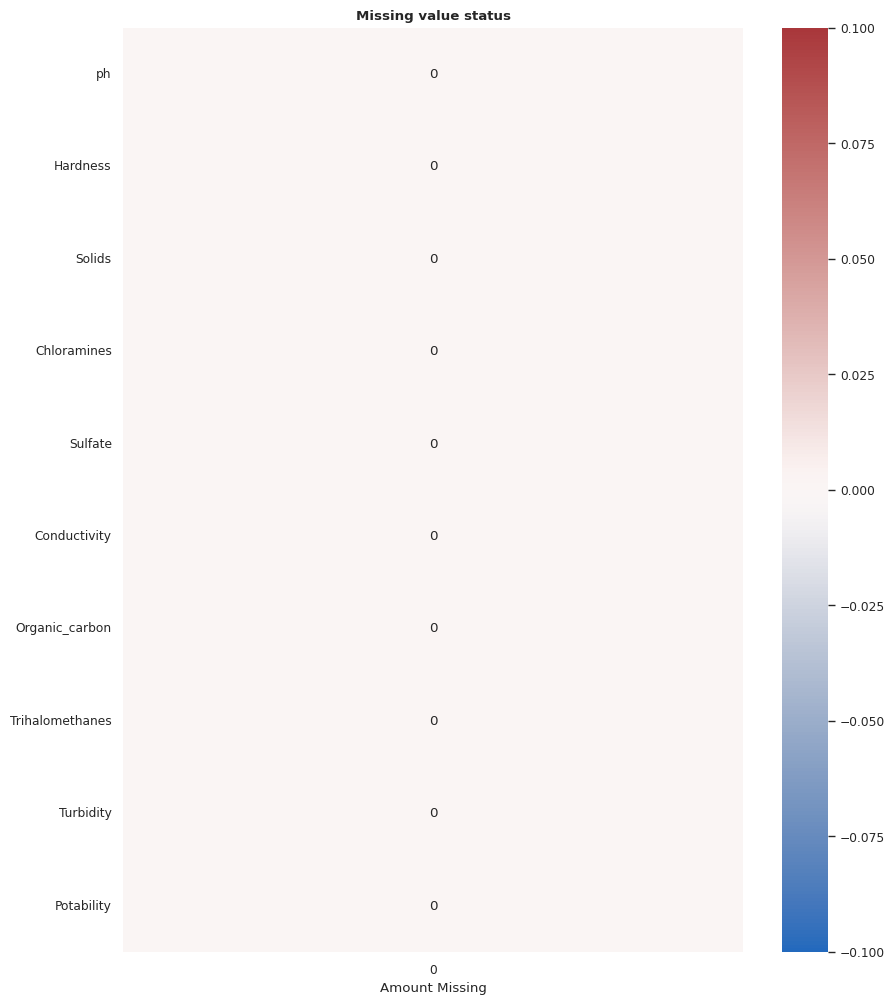

In [ ]:
data['ph'] = data['ph'].fillna(data.groupby(['Potability'])['ph'].transform('mean'))
data['Sulfate'] = data['Sulfate'].fillna(data.groupby(['Potability'])['Sulfate'].transform('mean'))
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

#visualization
plt.rc('figure',figsize= (10,12))
sns.set_context('paper',font_scale=1)

plt.title('Missing value status',fontweight = 'bold')
ax = sns.heatmap(data.isnull().sum().to_frame(),annot=True,fmt = 'd',cmap = 'vlag')
ax.set_xlabel('Amount Missing')
plt.show()

### 3.2 Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification.

### Feature Selection

In [ ]:
X = data.drop('Potability', axis = 1).copy()
y = data['Potability'].copy()

Balancing the data - Oversampling of minority level

- SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

Now, we are balancing the 0,1 target values using oversampling method

In [ ]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X, y = smt.fit_resample(X, y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1998, 1: 1278})

After SMOTE Counter({0: 1998, 1: 1998})


## Standard scaler:

- StandardScaler() standardizes features (such as the features of the person data i.e height, weight)by removing the mean and scaling to unit variance.

- (unit variance: Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity.)

- For the given dataset we are choosing standard scaler mehod so that feature values will be mapped to the nearest scaler value.

In [ ]:
ssc = StandardScaler()
X = ssc.fit_transform(X)

# 4. Model Building

## 4.1. Split the dataset into training and test sets. Justify your choice of split. You may experiment with different split to get the final split.

After multiple test iterations we found that the  ratio of 80:20 fits the best for the usecase and its the commonly used splitting ratio for the mdoel training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## 4.2. Build Model Development using Logistic Regression with penalty= l1 and l2,C= [1,0.5,0.1,0.01,0.003] . Identify the best parameter

L1 Regularization, also called a lasso regression, adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function.
L2 Regularization, also called a ridge regression, adds the “squared magnitude” of the coefficient as the penalty term to the loss function


<img src="https://miro.medium.com/v2/resize:fit:1400/1*Ri5Jj6mFqeHpeJXiFnwUgA.png">

### Parameters

Solver:
- Algorithm to use in the optimization problem.
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

random_state:
- Used to shuffle the data.

max_iter:
- Maximum number of iterations taken for the solvers to converge.

In [ ]:
C_values = [1, 0.5, 0.1,0.003,0.01]
best_accuracy = 0
best_penalty = ''
best_C = 0

for penalty in ['l1', 'l2']:
    for C in C_values:
        model = LogisticRegression(penalty=penalty, C=C, random_state=42, max_iter=10000,solver='liblinear')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Penalty: {penalty}, C: {C}, Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_penalty = penalty
            best_C = C

#identify best parameters and penalty
print(f"Best Penalty: {best_penalty}, Best C: {best_C}, Best Accuracy: {best_accuracy}")


Penalty: l1, C: 1, Accuracy: 0.50375
Penalty: l1, C: 0.5, Accuracy: 0.5075
Penalty: l1, C: 0.1, Accuracy: 0.51375
Penalty: l1, C: 0.003, Accuracy: 0.5025
Penalty: l1, C: 0.01, Accuracy: 0.5025
Penalty: l2, C: 1, Accuracy: 0.50125
Penalty: l2, C: 0.5, Accuracy: 0.50125
Penalty: l2, C: 0.1, Accuracy: 0.50125
Penalty: l2, C: 0.003, Accuracy: 0.4975
Penalty: l2, C: 0.01, Accuracy: 0.5
Best Penalty: l1, Best C: 0.1, Best Accuracy: 0.51375


From these results, we can observe that the model with the penalty='l1' and C=0.1 achieved the highest accuracy of 0.51375 on the test set. This means that when using a combination of L1 regularization and a C value of 0.1, the logistic regression model was able to accurately predict the target variable for unseen data.

# 5. Performance Evaluation

5.1. Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model

In [ ]:
model = LogisticRegression(penalty=best_penalty, C=best_C, random_state=42, max_iter=10000,solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [ ]:
acc_score=accuracy_score(y_pred, y_test)
print(f'Test Score is {acc_score}')

Test Score is 0.51375


In [ ]:
report=classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       407
           1       0.51      0.51      0.51       393

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



Using a larger weight for class 1 not improved and f1-score of both class are significantly equal, showing that the overarching of the model has been increased.

## 5.2. Comment on under fitting/overfitting/just right model.

ConfusionMatrix


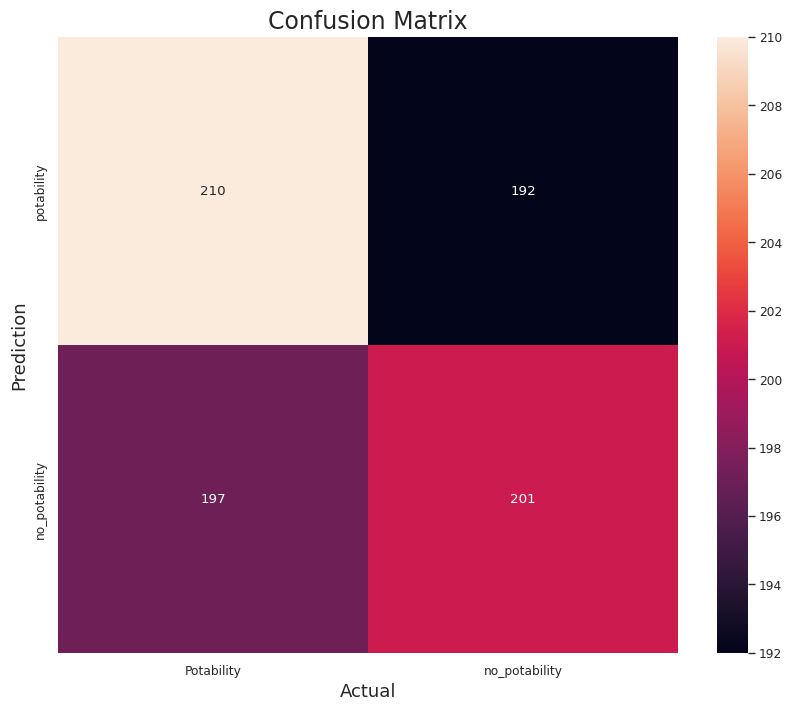

In [ ]:
from sklearn.metrics import confusion_matrix
print('ConfusionMatrix')
#Confusionmatrix
cf= confusion_matrix(y_test, y_pred)
#Plot the confusion matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(cf,
            annot=True,
            fmt='g',
            xticklabels=['Potability','no_potability'],
            yticklabels=['potability','no_potability'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

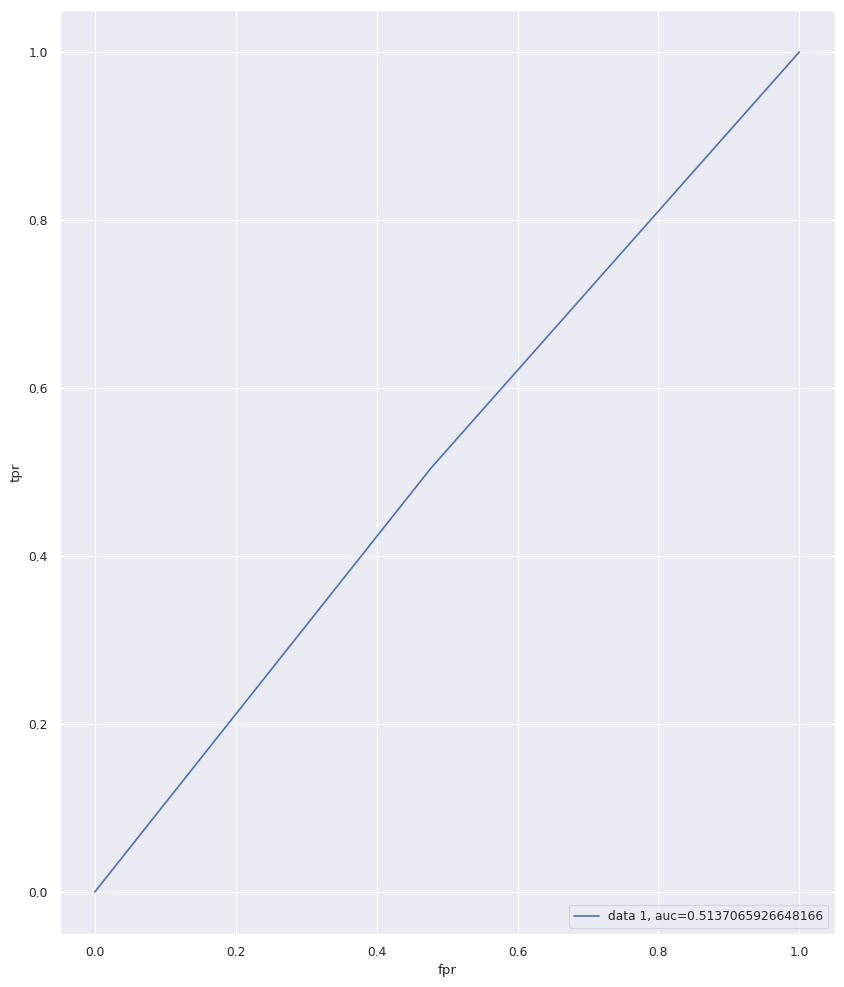

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

**F1score for both class is more or less same, it is difficult to definitively classify the model as overfitting or underfitting.**

In [ ]:
!jupyter nbconvert --output-dir=./ --to html ./Group70_WaterPotabilityDataset.ipynb